In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../data/titanic3.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.shape


(1309, 14)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
data['survived'].value_counts()


survived
0    809
1    500
Name: count, dtype: int64

In [6]:
data['sex'].value_counts()


sex
male      843
female    466
Name: count, dtype: int64

In [7]:
data[['sex', 'survived']].groupby('sex').mean()


,survived
sex,
female,0.727468
male,0.190985


In [8]:
data['pclass'].value_counts()


pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [9]:
data[['pclass', 'survived']].groupby('pclass').mean()


,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [10]:
data.groupby('pclass')['sex'].value_counts().sort_values(ascending=False)


pclass  sex   
3       male      493
        female    216
1       male      179
2       male      171
1       female    144
2       female    106
Name: count, dtype: int64

In [11]:
data[['sibsp', 'survived']].groupby('sibsp').mean().sort_values(by='survived', ascending=False)


,survived
sibsp,
1,0.510972
2,0.452381
0,0.346801
3,0.300000
4,0.136364
5,0.000000
8,0.000000


In [12]:
data[['parch', 'survived']].groupby('parch').mean().sort_values(by='survived', ascending=False)


,survived
parch,
3,0.625000
1,0.588235
2,0.504425
0,0.335329
4,0.166667
5,0.166667
6,0.000000
9,0.000000


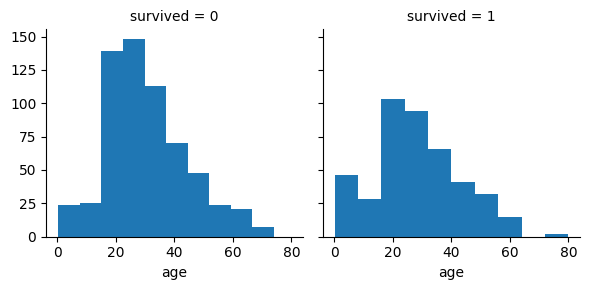

In [13]:
hist_age = sns.FacetGrid(data, col='survived')
hist_age.map(plt.hist, 'age', bins=10)

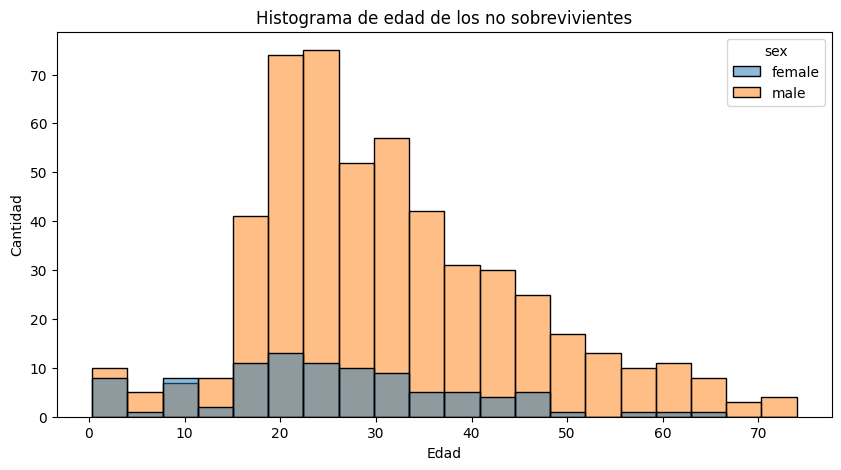

In [14]:

plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['survived'] == 0], x='age', hue='sex', bins=20, label='No sobrevivio')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Histograma de edad de los no sobrevivientes')
plt.show()

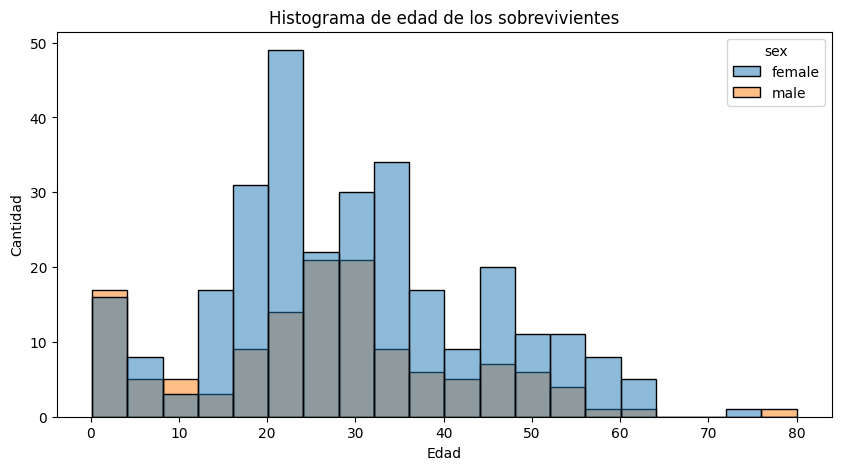

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data[data['survived'] == 1], x='age', hue='sex', bins=20, label='Sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Histograma de edad de los sobrevivientes')
plt.show()


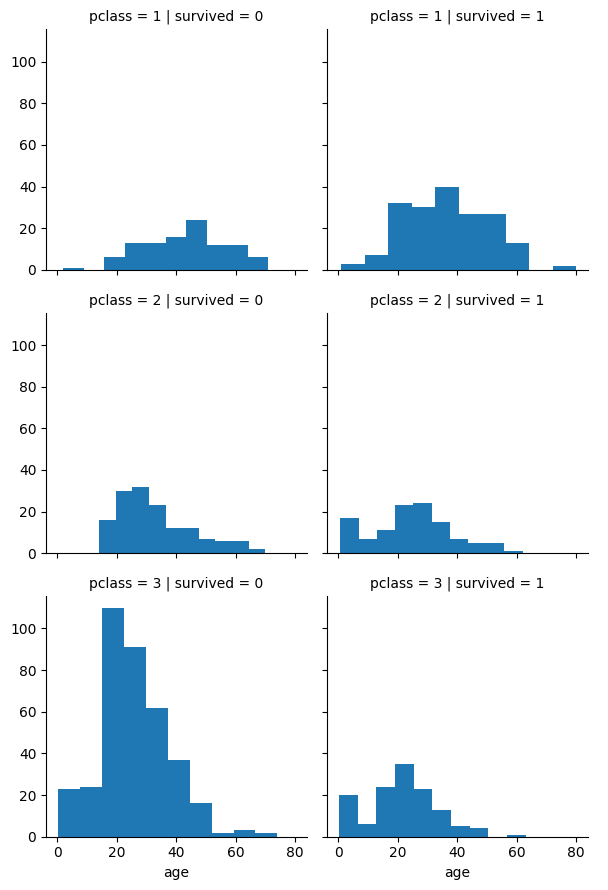

In [16]:

grid = sns.FacetGrid(data, col='survived', row='pclass')
grid.map(plt.hist, 'age', bins=10)
grid.add_legend()

In [17]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
ohe = one_hot_encoder.fit_transform(data[['sex']])
ohe = ohe.astype(int)


In [18]:
one_hot_encoded_df = pd.DataFrame(ohe.toarray(), columns=one_hot_encoder.get_feature_names_out(['sex']))
one_hot_encoded_df
     


,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [19]:
data = pd.concat([data, one_hot_encoded_df], axis=1)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


In [20]:
data.drop('sex', axis=1, inplace=True)
data
     

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   age         1046 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   ticket      1309 non-null   object 
 7   fare        1308 non-null   float64
 8   cabin       295 non-null    object 
 9   embarked    1307 non-null   object 
 10  boat        486 non-null    object 
 11  body        121 non-null    float64
 12  home.dest   745 non-null    object 
 13  sex_female  1309 non-null   int64  
 14  sex_male    1309 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


In [22]:
data.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1046 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1308 non-null   float64
 6   sex_female  1309 non-null   int64  
 7   sex_male    1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


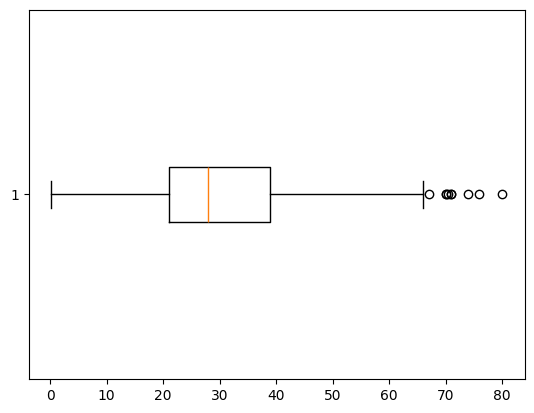

In [23]:
plt.boxplot(data['age'].dropna(), vert=False)
plt.show()
     

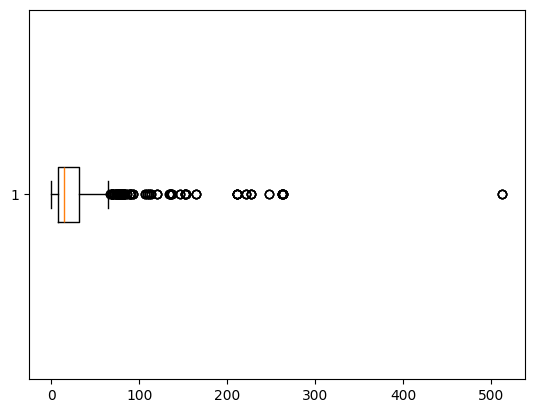

In [24]:
plt.boxplot(data['fare'].dropna(), vert=False)
plt.show()

In [25]:
data_copy = data.copy()


In [26]:
data_copy['age'].fillna(data_copy['age'].mean(), inplace=True)
data_copy['fare'].fillna(data_copy['fare'].median(), inplace=True)

C:\Users\JOSE ARMANDO\AppData\Local\Temp\ipykernel_11236\3163575884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['age'].fillna(data_copy['age'].mean(), inplace=True)
C:\Users\JOSE ARMANDO\AppData\Local\Temp\ipykernel_11236\3163575884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [27]:
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   sex_female  1309 non-null   int64  
 7   sex_male    1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [28]:
from sklearn.model_selection import train_test_split


In [29]:


X = data_copy.drop(['survived'], axis=1).values
y = data_copy['survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(data.shape)
print(X_train.shape)
print(X_test.shape)

(1309, 8)
(1047, 7)
(262, 7)


In [31]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
log_reg  = LogisticRegression(random_state=0, max_iter=400)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,400
,multi_class,'deprecated'


In [32]:
y_pred = log_reg.predict(X_test)


In [33]:
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])


Reales [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[127,  17],
       [ 43,  75]])

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [36]:

print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(log_reg.score(X_train, y_train) *100, 2))


Precisión 0.8152173913043478
Memoria 0.635593220338983
F1_score 0.7142857142857143
Score 79.47


In [37]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:

y_pred = cls.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])

Reales [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [39]:
confusion_matrix(y_test, y_pred)


array([[124,  20],
       [ 37,  81]])

In [40]:
print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(cls.score(X_train, y_train) *100, 2))

Precisión 0.801980198019802
Memoria 0.6864406779661016
F1_score 0.7397260273972602
Score 97.04


In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = rfc.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])


Reales [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [43]:
confusion_matrix(y_test, y_pred)


array([[125,  19],
       [ 40,  78]])

In [44]:
print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(rfc.score(X_train, y_train) *100, 2))

Precisión 0.8041237113402062
Memoria 0.6610169491525424
F1_score 0.7255813953488373
Score 97.04


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
y_pred = knn.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])
print(confusion_matrix(y_test, y_pred))
print('Precisión', precision_score(y_test, y_pred))
print('Memoria', recall_score(y_test, y_pred))
print('F1_score', f1_score(y_test, y_pred))
print('Score', round(knn.score(X_train, y_train) *100, 2))

Reales [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]
[[119  25]
 [ 59  59]]
Precisión 0.7023809523809523
Memoria 0.5
F1_score 0.5841584158415841
Score 78.99
